# ZADANIE 1

Pogoda

In [2]:
function weath(α, β, time)
    S = zeros(Float32, 2, time)
    P = [1-α α; β 1-β]
    r = rand()
     
    S[1:2, 1] = [r, 1-r]
    for t in 2:time
        S[1:2, t] = P*S[1:2, t-1]
    end
    return S
end

using Plots

function printer(g)
    heatmap(g,
    aspect_ratio = 2,
    framestyle = :none,
    ) 
end


printer (generic function with 1 method)

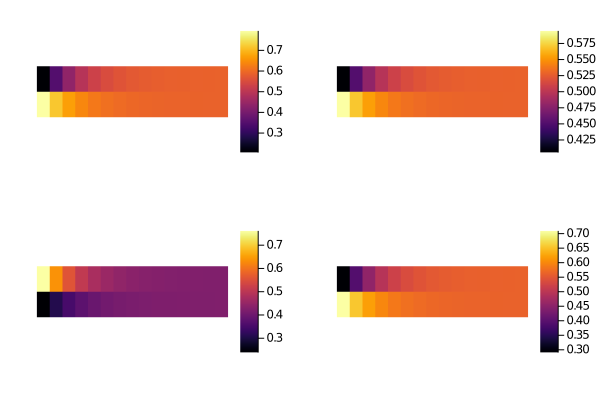

In [4]:
a = 0.13
b = 0.24
tm = 15
p = [printer(weath(a, b, tm)) for _ in 1:4]
plot(p..., layout = (2,2))

Mutacje DNA

In [139]:
using Plots
using Random

function choosenums(n, sum)     #halfly random, but it's enough for such a purpose
    T = zeros(Float32, 4)
    for i in 1:n
        T[i] = rand(0:(sum*10000))/10000
        sum -= T[i] 
    end
    return shuffle(T)
end


function mut(v, time)
    S = zeros(Float32, 4, time)
    Pᵢⱼ₁ = 1/4 +3/4*exp(-4*v/3)
    Pᵢⱼ₂ = 1/4 - 1/4*exp(-4*v/3)
    P = fill(Pᵢⱼ₂, 4, 4)
    
    for i in 1:size(P,1)
        P[i, i] = Pᵢⱼ₁ end

    S[1:end, 1] = choosenums(4,1)
    for t in 2:time
        S[1:end, t] = P*S[1:end, t-1]
    end
    return S
end


function printer(g)
    heatmap(g,
    aspect_ratio = 2,
    framestyle = :none
    ) 
end

printer (generic function with 3 methods)

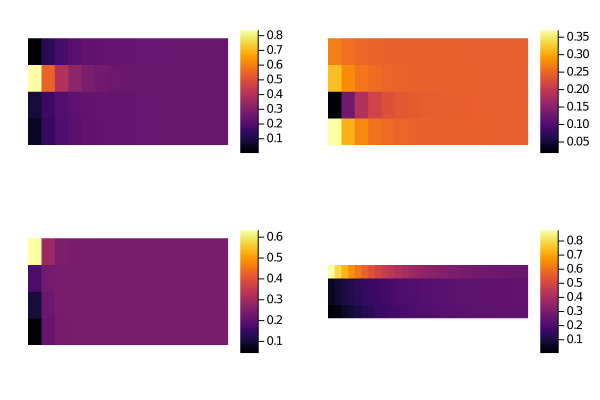

In [140]:
tm = 15
p = [printer(mut(0.5, tm)),printer(mut(0.5, tm)),printer(mut(1.5, tm)),printer(mut(0.1, 30))]
plot(p..., layout = (2,2))

# ZADANIE 2

In [9]:
function sr(M)
    n = size(M,1)
    m = size(M,2)
    P = zeros(Int8, n, m)
    
    for i in 1:n
        for j in 1:m
            cnt = 0
            for k in [mod1(i-1,n),i,mod1(i+1,n)]
                for l in [mod1(j-1,m),j,mod1(j+1,m)]
                    if M[k,l] == 1 && (k != i || l != j)
                    cnt += 1 end
                end
            end
            if M[i,j] == 1 && !(cnt in [2,3])
                P[i,j] = 1
            elseif M[i,j] == 0 && cnt == 3
                P[i,j] = 1 end
        end
    end
    return P    
end

function ac(Mat,time)
    tab = [Mat]
    for t in 2:time
        push!(tab, (tab[t-1]).⊻(sr(tab[t-1])))
    end
    return tab
end

using Plots


function anim(matr, tm, filename)
    an = @animate for c in 1:tm
    heatmap(ac(matr, tm)[c],
    aspect_ratio = 1,
    seriescolor = palette([:white, :black]),
    colorbar = :none,
    xflip = true,        
    framestyle = :none
    )
    end
    gif(an,filename, fps = 4)
end


anim (generic function with 1 method)

Losowy.

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\rand.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\rand.gif")
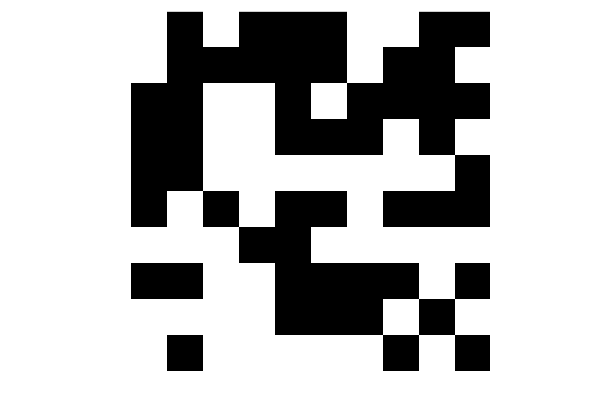

In [4]:
anim(rand((0,1),10,10), 30, "rand.gif")

Stały.

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\boat.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\boat.gif")
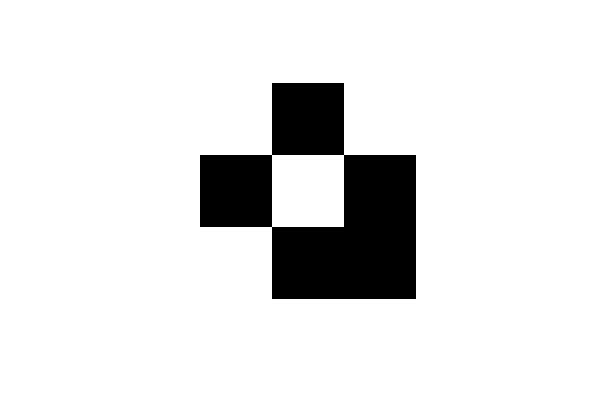

In [5]:
boat = [0 0 0 0 0; 0 1 1 0 0; 0 1 0 1 0; 0 0 1 0 0; 0 0 0 0 0]
anim(boat, 2, "boat.gif")

Podróżujący.

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\dac.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\dac.gif")
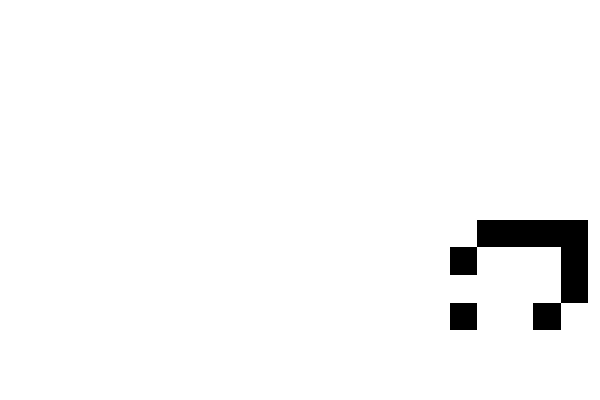

In [6]:
plane = zeros(Int8, 10, 20)
dac = [0 1 0 0 1; 1 0 0 0 0; 1 0 0 0 1; 1 1 1 1 0]
plane[1:4,1:5] = dac
anim(plane, 50, "dac.gif")

Zmienny.

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\frog.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\frog.gif")
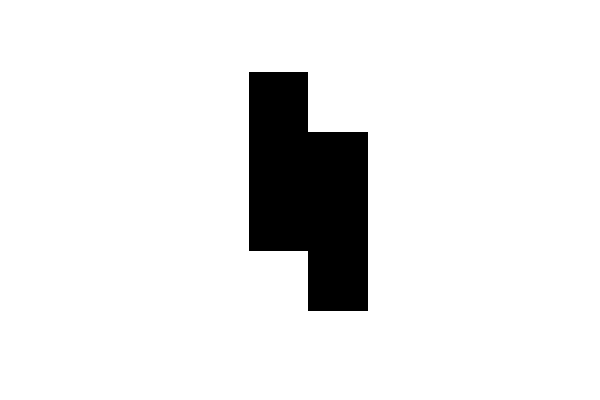

In [7]:
frog = [0 0 0 0 0 0; 0 0 1 0 0 0; 0 0 1 1 0 0; 0 0 1 1 0 0; 0 0 0 1 0 0; 0 0 0 0 0 0]
anim(frog, 4, "frog.gif")

# ZADANIE 3

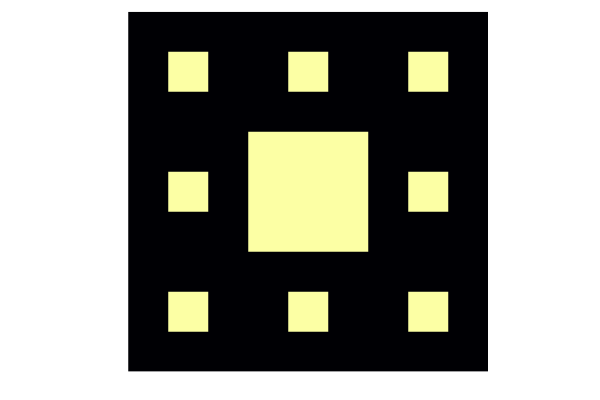

In [4]:

function sier_carp(N)
    A = falses(3^N,3^N)
    for n in 1:N
        for i in 1:3^(n-1)
            for j in 1:3^(n-1)
                A[(3*i-2)*(3^(N-n))+1:(3*i-1)*(3^(N-n)),
                    (3*j-2)*(3^(N-n))+1:(3*j-1)*(3^(N-n))] .= true
            end
        end
    end
    return A
end

using Plots
heatmap(sier_carp(2),
aspect_ratio = 1,
colorbar = :none,
framestyle = :none
)



Jeśli kwadrat ma długość boku 1, to pole białej części jest równe:

In [147]:
fld_wh(n) = sum(sier_carp(n))/9^n
fld_wh(2)

0.20987654320987653

Porównanie pól dla kolejnego stopnia "zagłebienia".

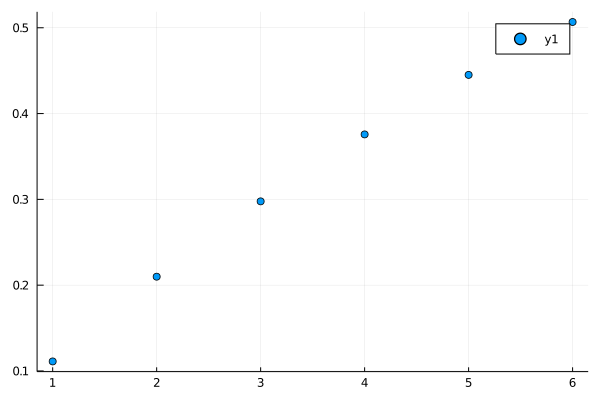

In [149]:
ys =[fld_wh(n) for n in 1:6]
scatter(1:6,ys)

# ZADANIE 4

In [30]:
function rod(t, d, Δt, Δx, c, u_01 = 0, u_0n = 0, isol = false, T₀ = [])
    lent = Int(ceil(t/Δt))
    lenx = Int(ceil(d/Δx))

    A = zeros(Float64, lent, lenx)
    
    stab = c*Δt/(Δx)^2
    if stab > 0.5
        print("unstable -- ", stab)
        return A
    end
   
    if size(T₀, 1) == 0
    elseif size(T₀, 1) == 1
        A[1:1, 1:end] .= T₀[1]
    elseif size(T₀, 1) == lenx
        A[1:1, 1:end] = T₀
    else
        error(BoundsError("Wrong T_0 dimension"))
    end
    for t in 2:lent
        for x in 2:(lenx-1)
            if isol == false
                A[t, 1] = u_01
                A[t, lenx] = u_0n
            else
                A[t, 1] = A[t-1, 2]
                A[t, lenx] = A[t-1, lenx-1]
            end

            A[t, x] = c*Δt/(Δx)^2*(A[t-1,x+1]-2*A[t-1, x]+A[t-1,x-1])+A[t-1, x]
        end
    end
    return A
end

using Plots
function animm(mat, filename)
    an = @animate for t in 1:size(mat,1)
    heatmap(mat[t:t, :],
    aspect_ratio = 3,   
    framestyle = :none,
    )

    end
    gif(an,filename, fps = 30)
end

animm (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\simple.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\simple.gif")
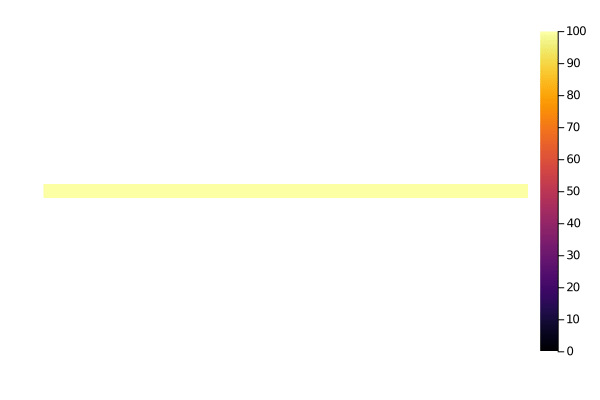

In [31]:
animm(rod(1, 100, 0.01, 1, 40, 300, 600, false, [100]), "simple.gif")

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\sin1.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\sin1.gif")
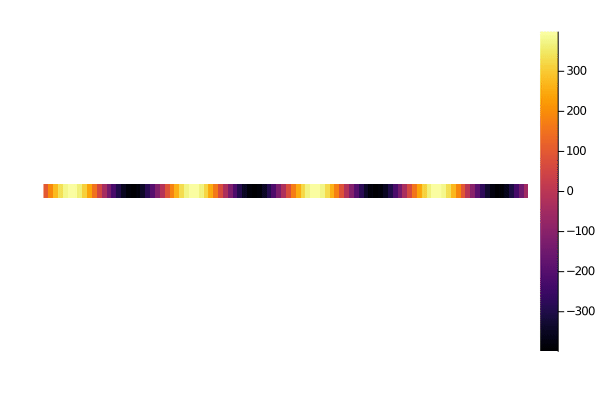

In [32]:
T1 = [400*sin(i/4) for i in 1:100]
animm(rod(2, 100, 0.01, 1, 40, 0, 0, true, T1), "sin1.gif")

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\points.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\points.gif")
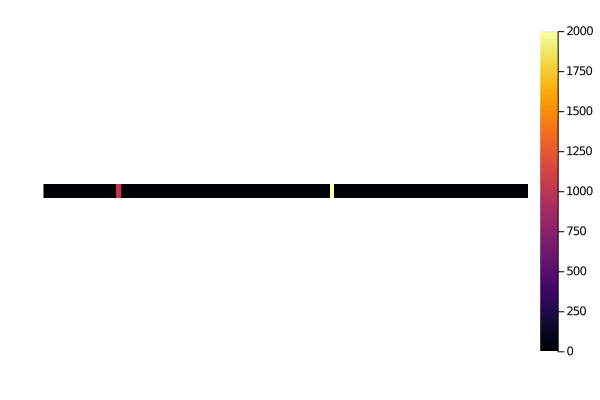

In [152]:
T2 = zeros(Float64,100)
T2[16] = 1000
T2[60]= 2000

animm(rod(1, 100, 0.01, 1, 40, 0, 0, true, T2), "points.gif")

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\shlf.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\shlf.gif")
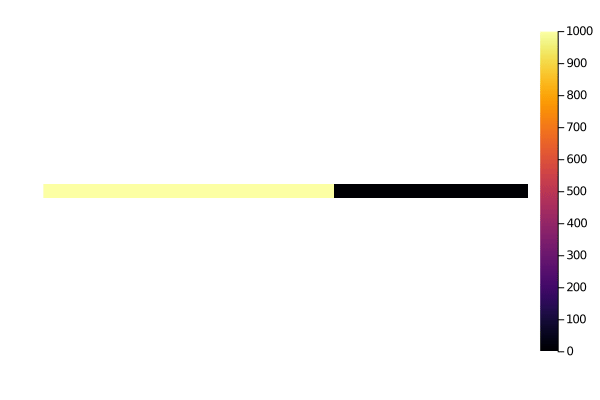

In [13]:
T3 = zeros(Float64,100)
T3[1:60] .= 1000

animm(rod(1, 100, 0.01, 1, 40, 0, 0, true, T3), "shlf.gif")

┌ Info: Saved animation to 
│   fn = C:\Users\cp\pakiety\shlf.gif
└ @ Plots C:\Users\cp\.julia\packages\Plots\SjqWU\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\cp\\pakiety\\shlf.gif")
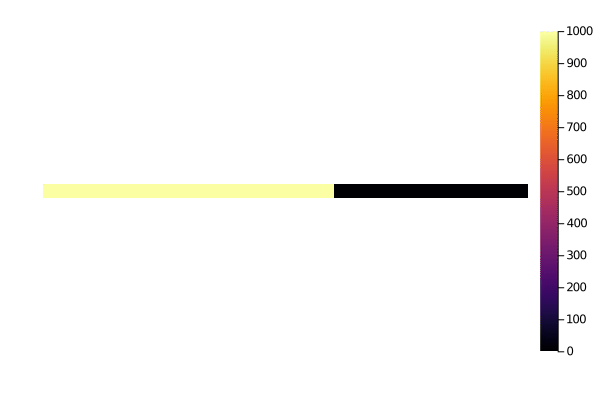

In [151]:
T3 = zeros(Float64,100)
T3[1:60] .= 1000

animm(rod(1, 100, 0.01, 1, 40, 200, 1000, false, T3), "shlf.gif")